In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from scipy.fft import fft, fftfreq
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
file= pd.read_csv("C:\\Users\\hp\\Documents\\SBC\\SBC proiect\\archive 1\\Occupancy_Estimation_a1.csv")
display(file.head())

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
display('Check if there are any missing values.')
display(file.isnull().sum())

'Check if there are any missing values.'

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [4]:
display(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

None

In [5]:
file.select_dtypes(include=['number']).describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [6]:
file['Date'] = pd.to_datetime(file['Date'])
file['Time'] = pd.to_datetime(file['Time'])
file.info()

C:\Users\hp\AppData\Local\Temp\ipykernel_18852\2186726093.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file['Time'] = pd.to_datetime(file['Time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10129 non-null  datetime64[ns]
 1   Time                  10129 non-null  datetime64[ns]
 2   S1_Temp               10129 non-null  float64       
 3   S2_Temp               10129 non-null  float64       
 4   S3_Temp               10129 non-null  float64       
 5   S4_Temp               10129 non-null  float64       
 6   S1_Light              10129 non-null  int64         
 7   S2_Light              10129 non-null  int64         
 8   S3_Light              10129 non-null  int64         
 9   S4_Light              10129 non-null  int64         
 10  S1_Sound              10129 non-null  float64       
 11  S2_Sound              10129 non-null  float64       
 12  S3_Sound              10129 non-null  float64       
 13  S4_Sound        

In [7]:
display("Merge the Time and Date columns to create Date_Time.")
DateTime = file['Date'] + (file['Time'] - file['Time'].dt.normalize()) 
file.insert(loc=0, column="Date_Time", value=DateTime)
file.drop(columns=['Date', 'Time'], inplace=True)


'Merge the Time and Date columns to create Date_Time.'

In [8]:
display("Categorize the hours into time intervals of the day.")
file['Hours'] = file['Date_Time'].dt.hour
file['Time_of_Day'] = pd.cut(file['Hours'], bins = [0,6,12,17,22,24], labels = ['Night','Morning','Afternoon','Evening','Night'], include_lowest=True, ordered = False)
file.pop('Hours')
day_time = file.pop('Time_of_Day')
file.insert(1, 'Time_of_Day', day_time)
file.head()

'Categorize the hours into time intervals of the day.'

,Date_Time,Time_of_Day,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22 10:49:41,Morning,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017-12-22 10:50:12,Morning,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017-12-22 10:50:42,Morning,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017-12-22 10:51:13,Morning,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017-12-22 10:51:44,Morning,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


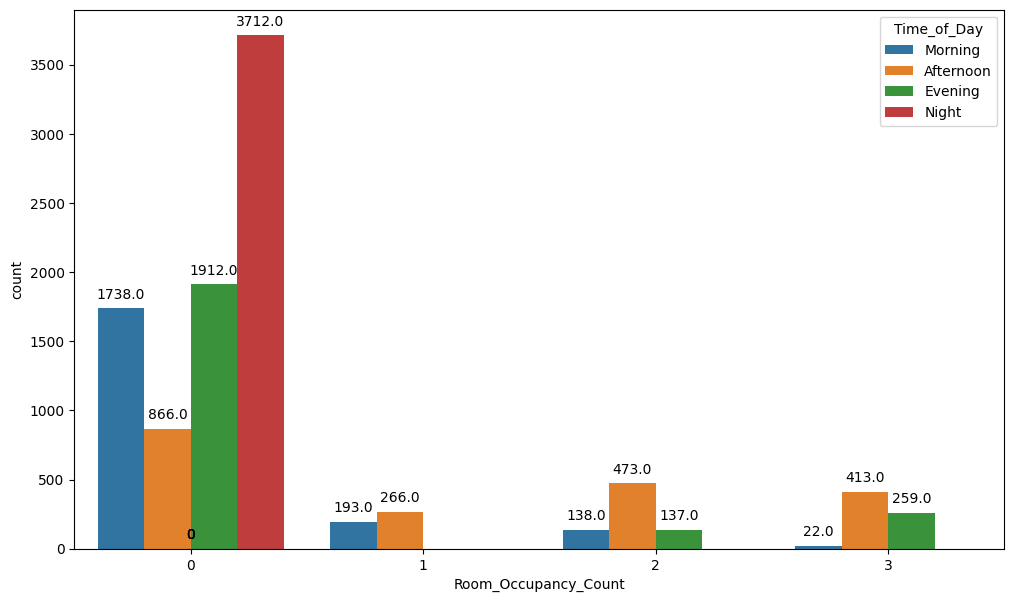

In [9]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data = file,x = 'Room_Occupancy_Count', hue = 'Time_of_Day', hue_order = ['Morning','Afternoon','Evening','Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

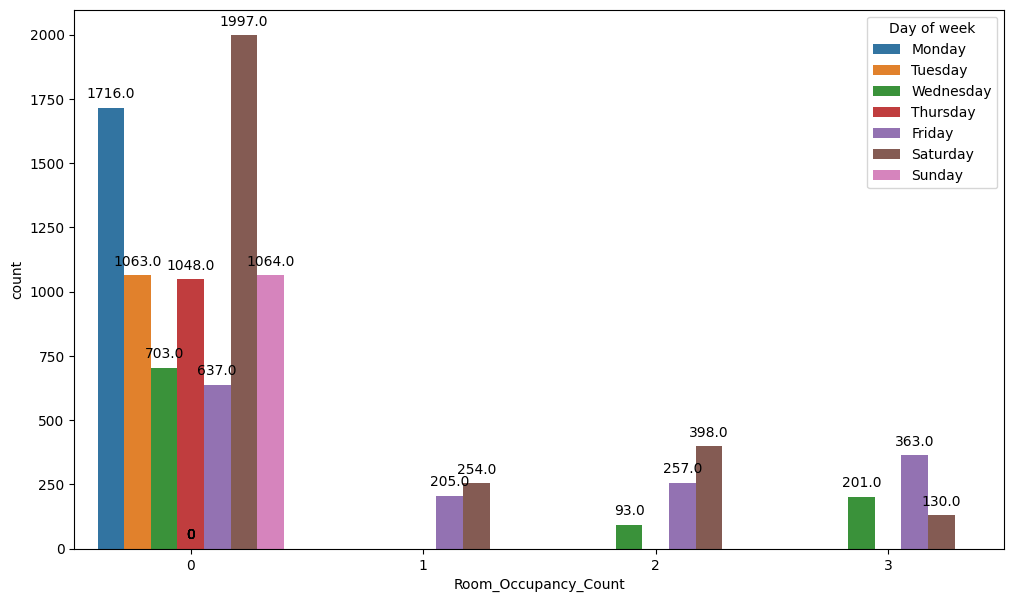

In [10]:
file['Date_Time'] = pd.to_datetime(file['Date_Time'], errors='coerce')
weekday = file['Date_Time'].dt.weekday + 1  
file.insert(loc=0, column="Day of week", value=weekday)
file['Day of week'] = pd.cut(file['Day of week'], bins=[0, 1, 2, 3, 4, 5, 6, 7], 
                             labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                             include_lowest=True, ordered=False)
plt.figure(figsize=(12,7))
ax = sns.countplot(data = file,x = 'Room_Occupancy_Count', hue = 'Day of week', hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig("grafic_test.png", dpi=300)
plt.show()

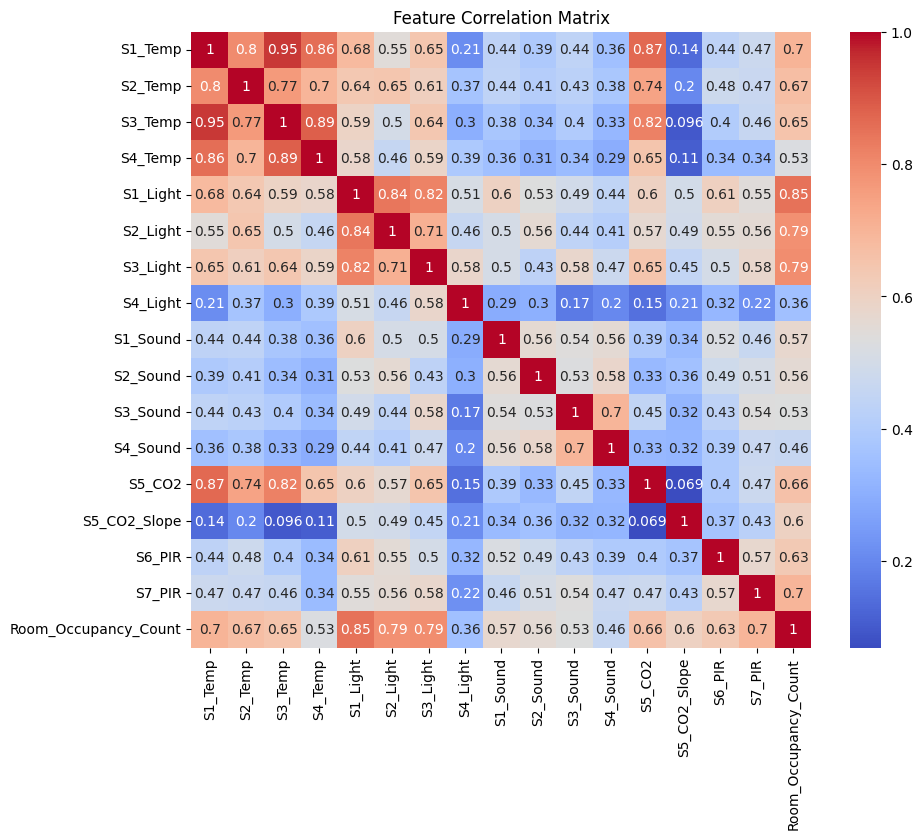

In [11]:
data_numeric = file.select_dtypes(include=['number'])
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [12]:
display('Removing columns with high correlation (> 0.8)')
file.drop(columns=['S3_Temp','S4_Temp','S2_Light','S3_Light'],axis=1,inplace=True)

'Removing columns with high correlation (> 0.8)'

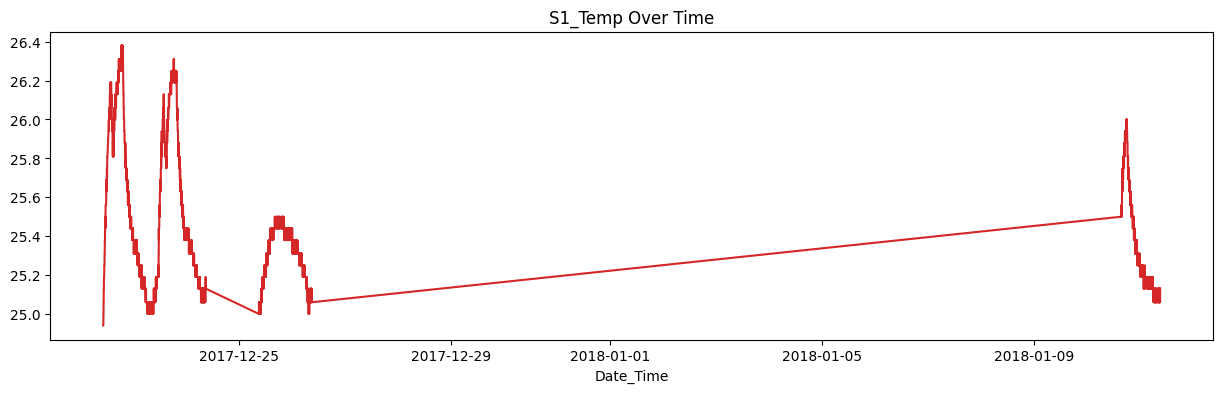

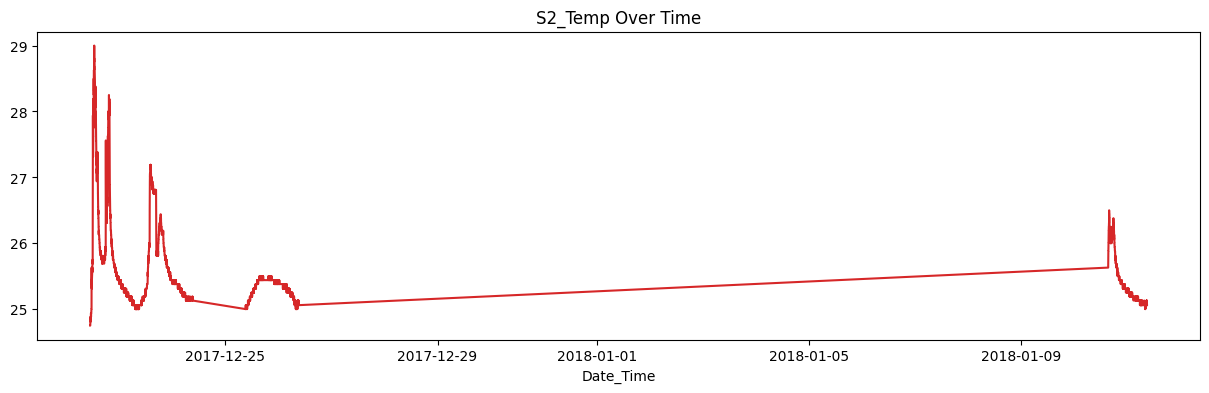

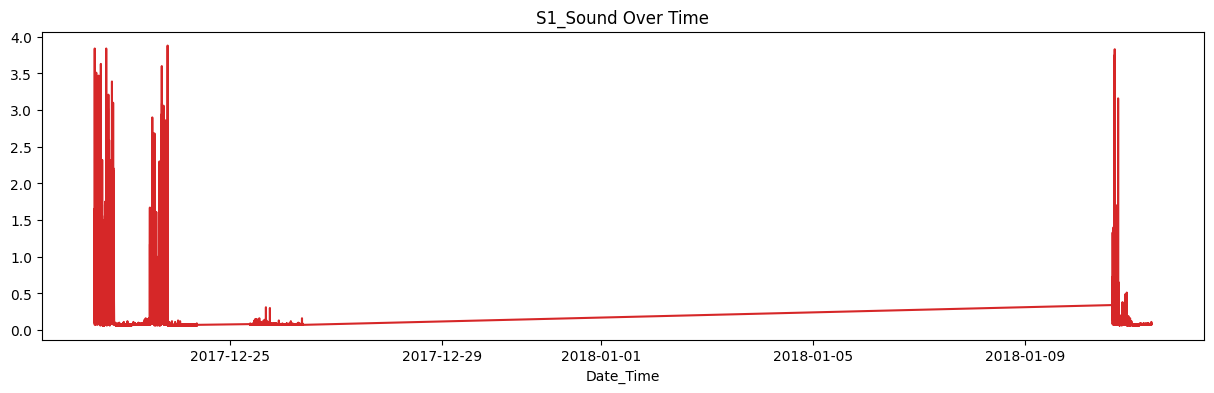

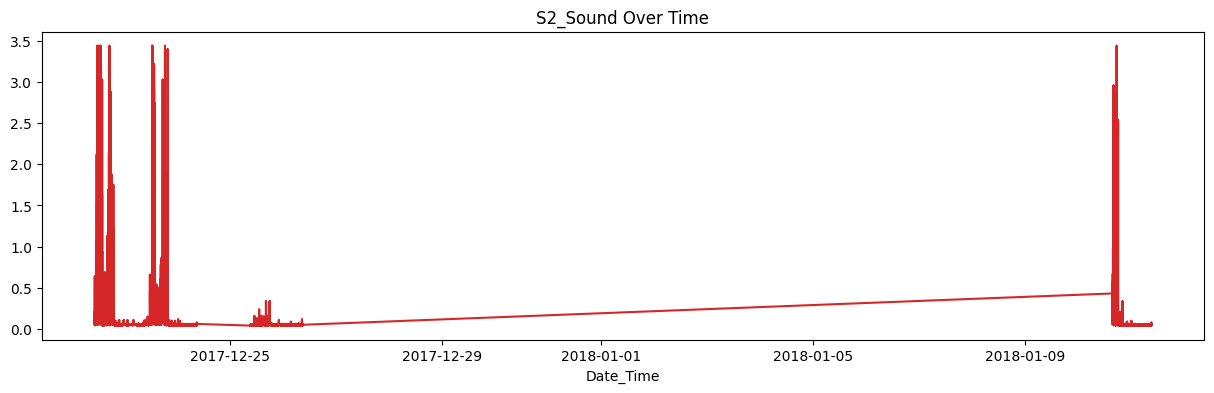

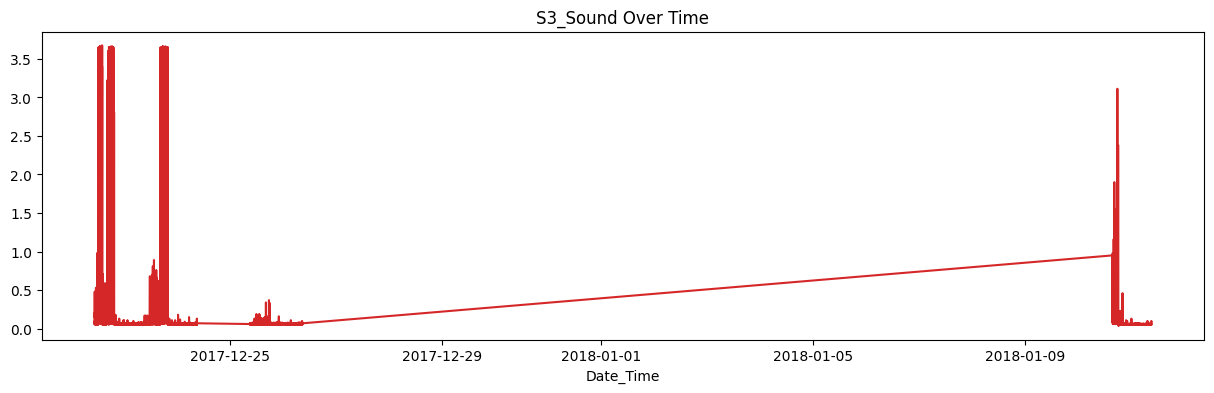

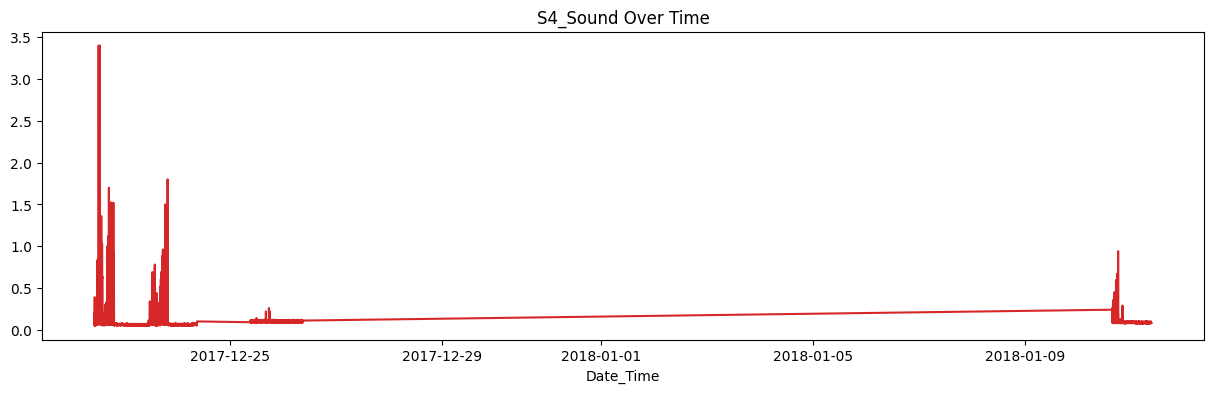

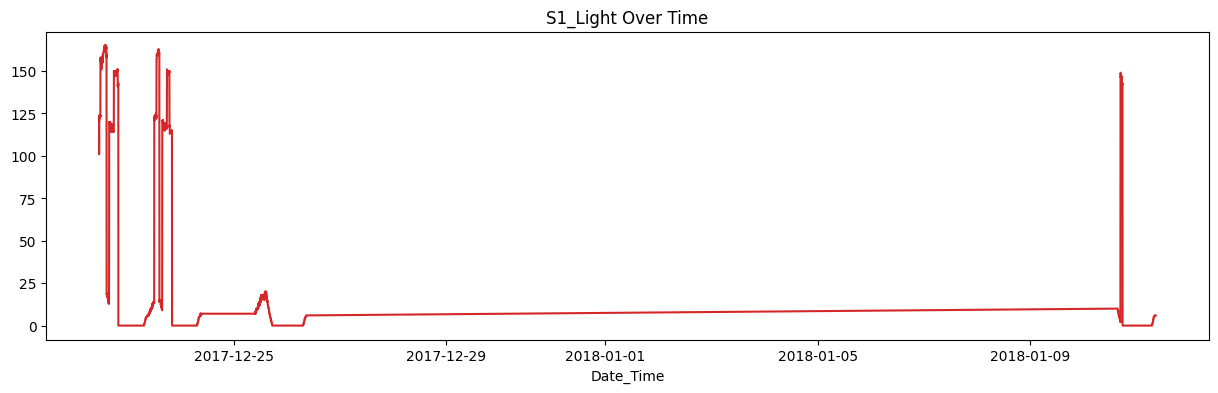

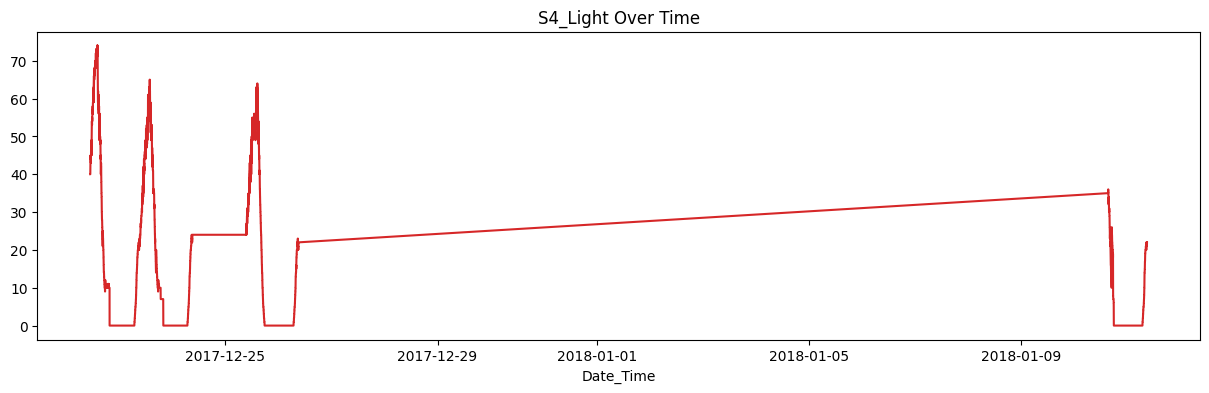

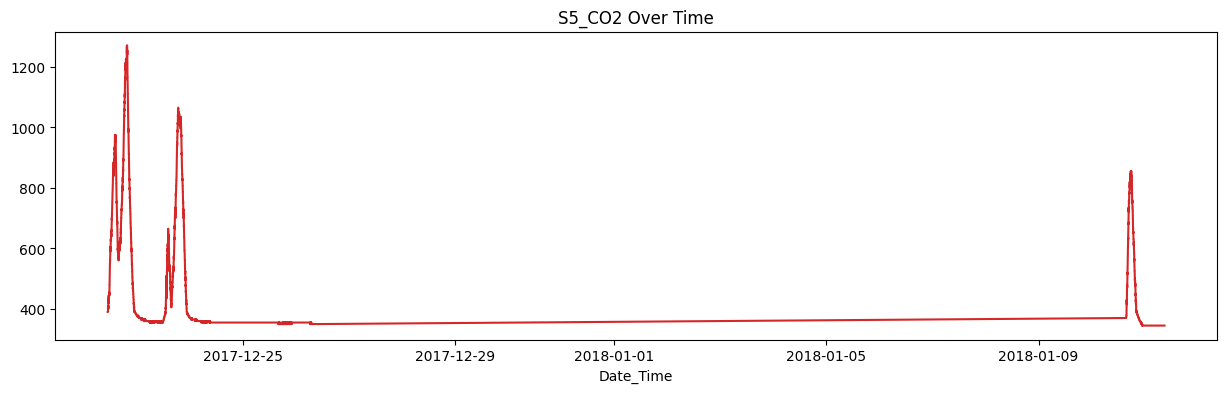

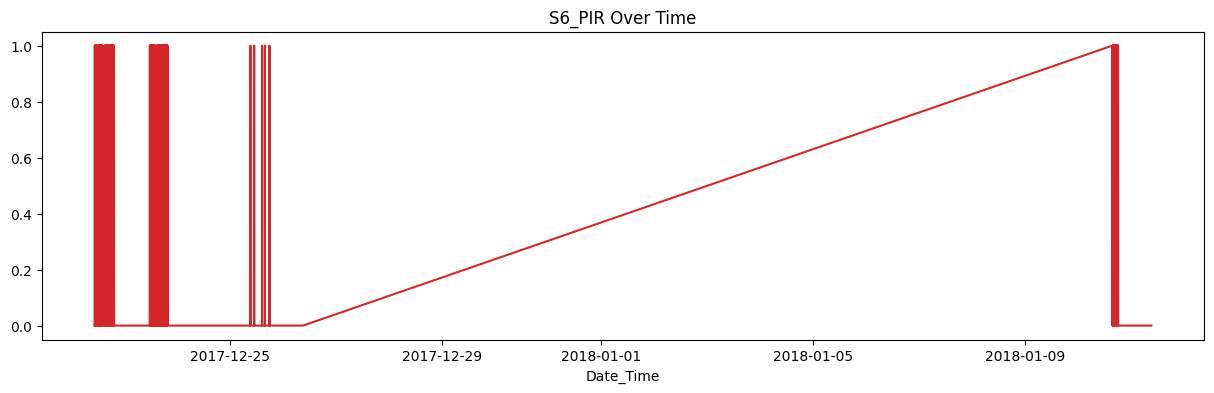

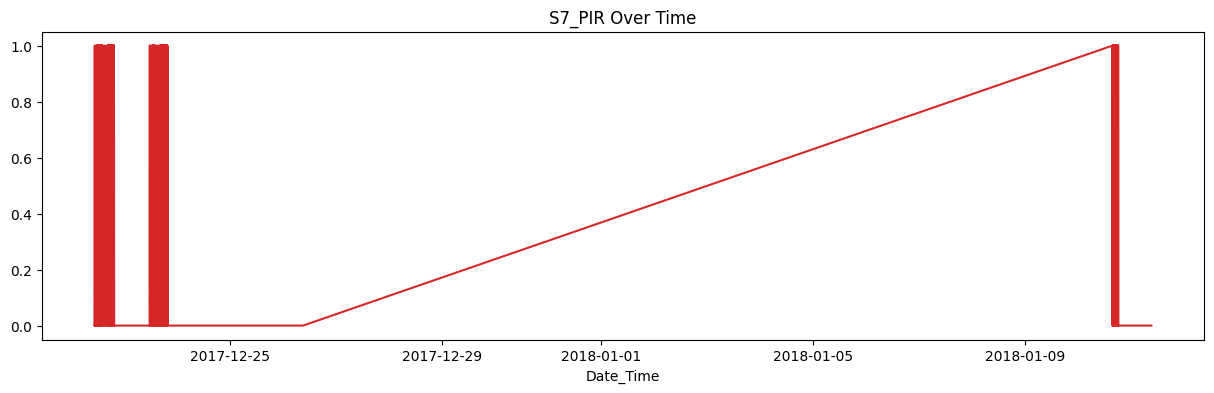

In [13]:
def plot_df(df, x, y, title="", xlabel='Date_Time', ylabel='', dpi=100):
 plt.figure(figsize=(15,4), dpi=dpi)
 plt.plot(x, y, color='tab:red')
 plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
 plt.show()

plot_df(file, x=file['Date_Time'], y=file['S1_Temp'], title="S1_Temp Over Time")
plot_df(file, x=file['Date_Time'], y=file['S2_Temp'], title="S2_Temp Over Time")

plot_df(file, x=file['Date_Time'], y=file['S1_Sound'], title="S1_Sound Over Time")  
plot_df(file, x=file['Date_Time'], y=file['S2_Sound'], title="S2_Sound Over Time")  
plot_df(file, x=file['Date_Time'], y=file['S3_Sound'], title="S3_Sound Over Time")  
plot_df(file, x=file['Date_Time'], y=file['S4_Sound'], title="S4_Sound Over Time") 
 
plot_df(file, x=file['Date_Time'], y=file['S1_Light'], title="S1_Light Over Time")  
plot_df(file, x=file['Date_Time'], y=file['S4_Light'], title="S4_Light Over Time")  

plot_df(file, x=file['Date_Time'], y=file['S5_CO2'], title="S5_CO2 Over Time")

plot_df(file, x=file['Date_Time'], y=file['S6_PIR'], title="S6_PIR Over Time")
plot_df(file, x=file['Date_Time'], y=file['S7_PIR'], title="S7_PIR Over Time")



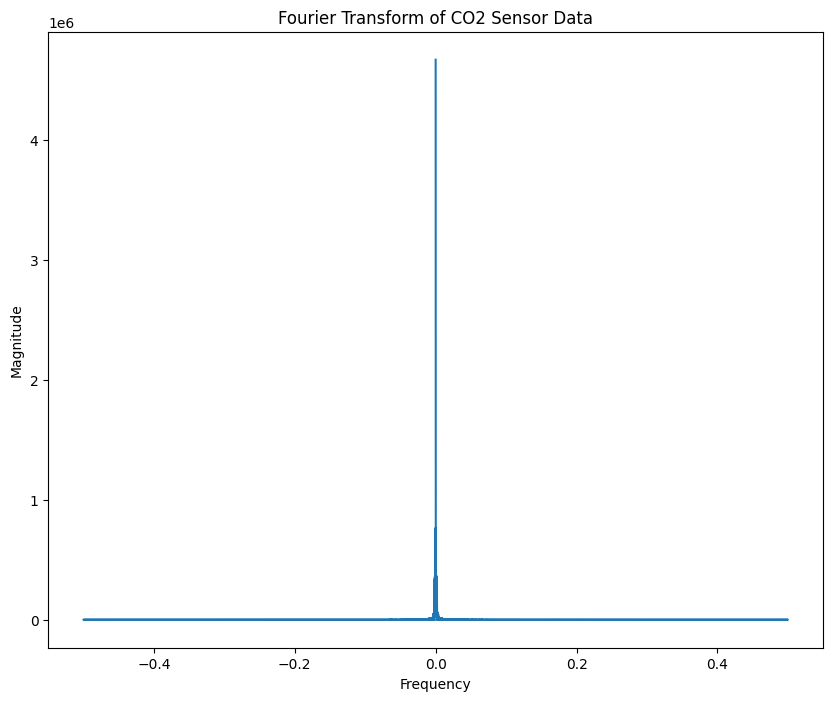

In [34]:
co2_signal = file['S5_CO2'].values

def apply_fourier_transform(series):
 fourier = np.fft.fft(series)
 frequency = np.fft.fftfreq(len(series))
 return frequency, np.abs(fourier)
    
frequency, co2_fft = apply_fourier_transform(co2_signal)
plt.figure(figsize=(10,8))
plt.plot(frequency, co2_fft)
plt.title("Fourier Transform of CO2 Sensor Data")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

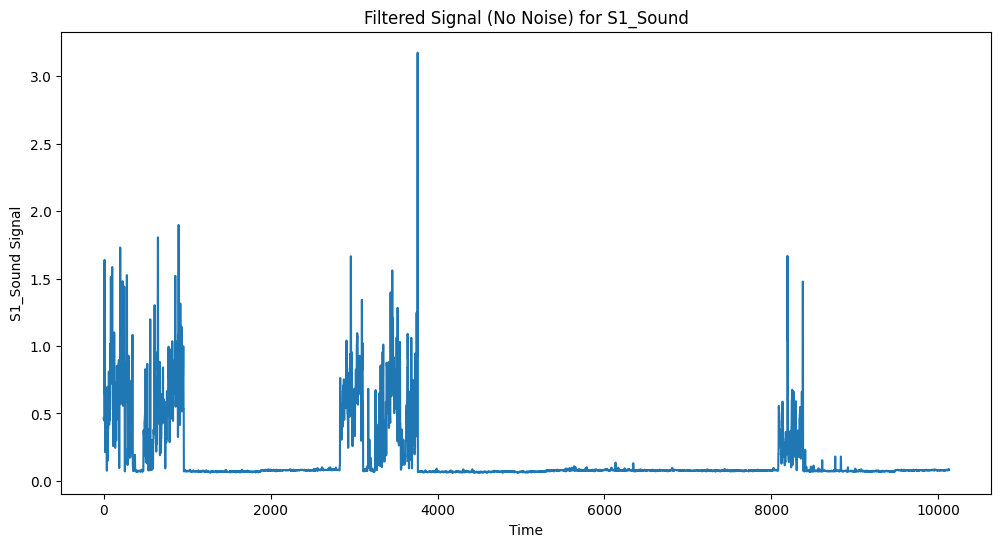

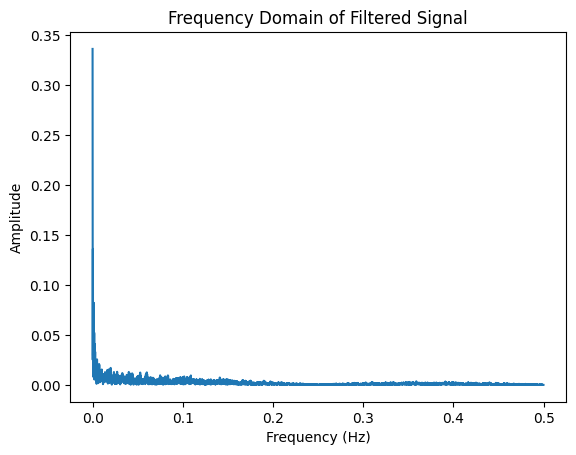

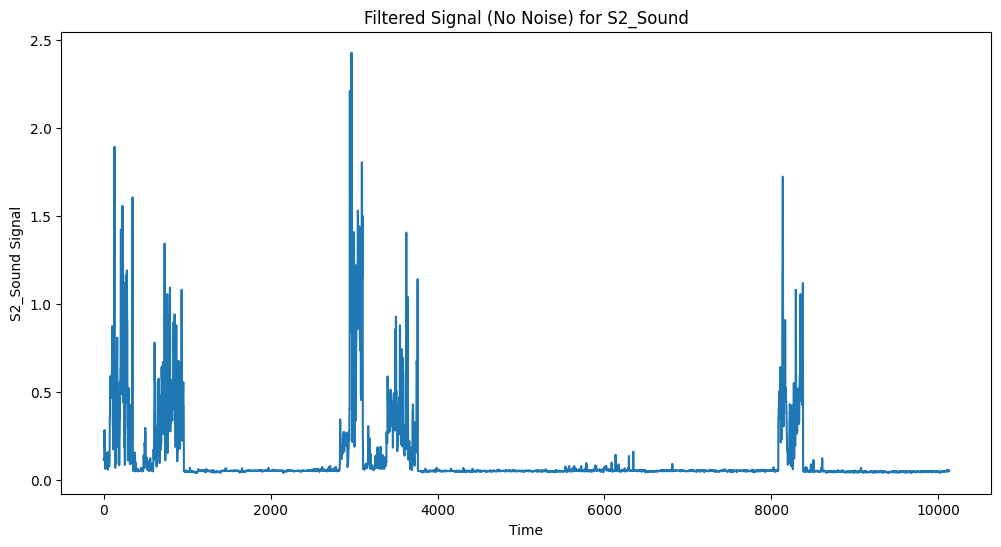

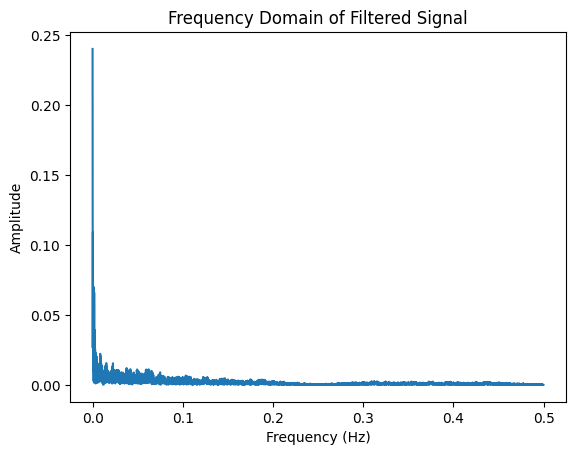

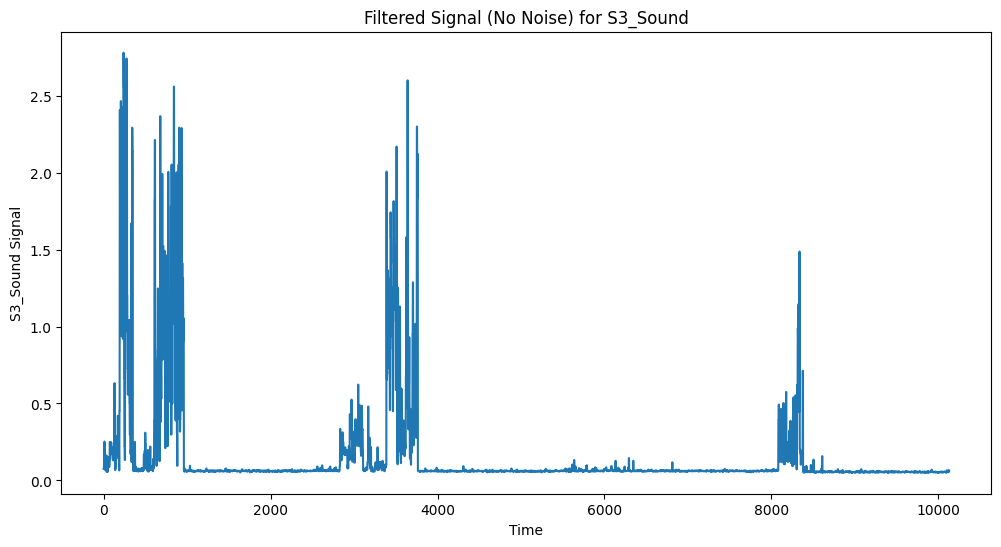

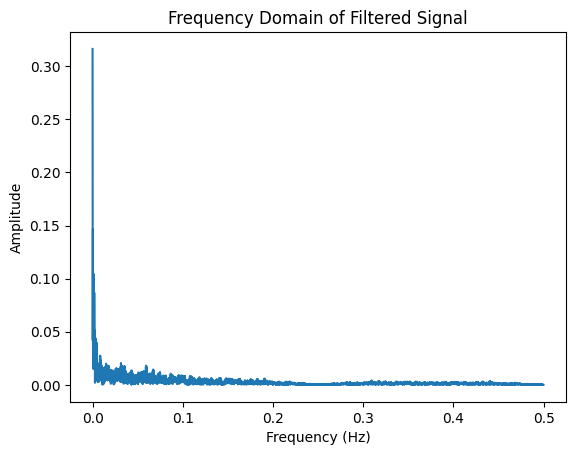

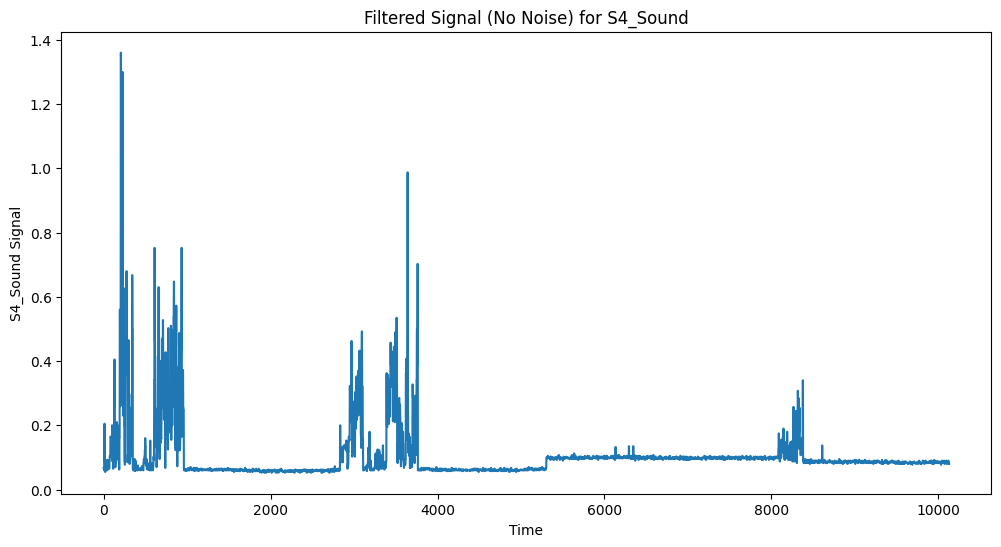

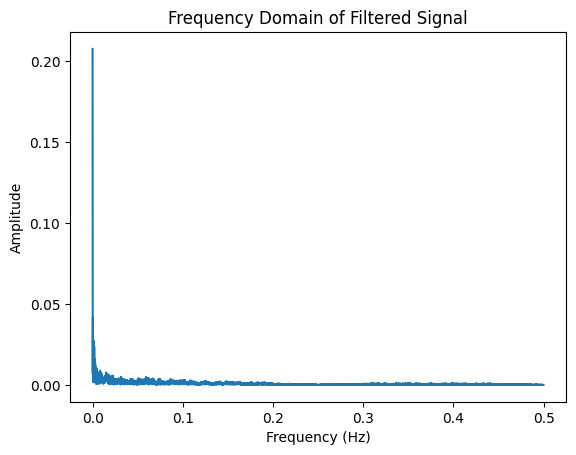

In [15]:
filtered_signals = {}

def apply_wavelet_transform(signal, wavelet='db1', level=2):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    return coeffs

def filter_and_plot_sound_sensor(sensor_data, sensor_name):
    sound_wavelet_coeffs = apply_wavelet_transform(sensor_data)
    filtered_coeffs = [sound_wavelet_coeffs[0], None, None] 
    cleaned_signal = pywt.waverec(filtered_coeffs, 'db1')
    filtered_signals[sensor_name] = cleaned_signal
    plt.figure(figsize=(12, 6))
    plt.plot(cleaned_signal)
    plt.title(f"Filtered Signal (No Noise) for {sensor_name}")
    plt.xlabel('Time')
    plt.ylabel(f'{sensor_name} Signal')
    plt.show()
    plot_frequency_domain(cleaned_signal)

def plot_frequency_domain(signal, sample_rate=1.0):
    N = len(signal)
    T = 1.0 / sample_rate
    x = fftfreq(N, T)[:N//2]
    y = fft(signal)
    plt.plot(x, 2.0/N * np.abs(y[:N//2]))
    plt.title("Frequency Domain of Filtered Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()

sound_sensors = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']
for sensor in sound_sensors:
    sensor_data = file[sensor].values  
    filter_and_plot_sound_sensor(sensor_data, sensor)


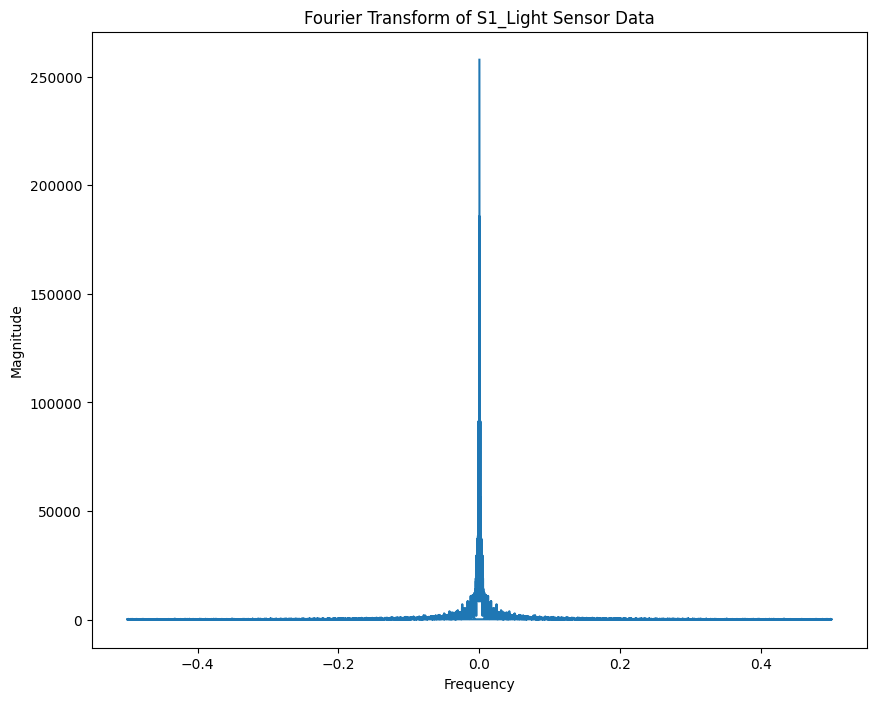

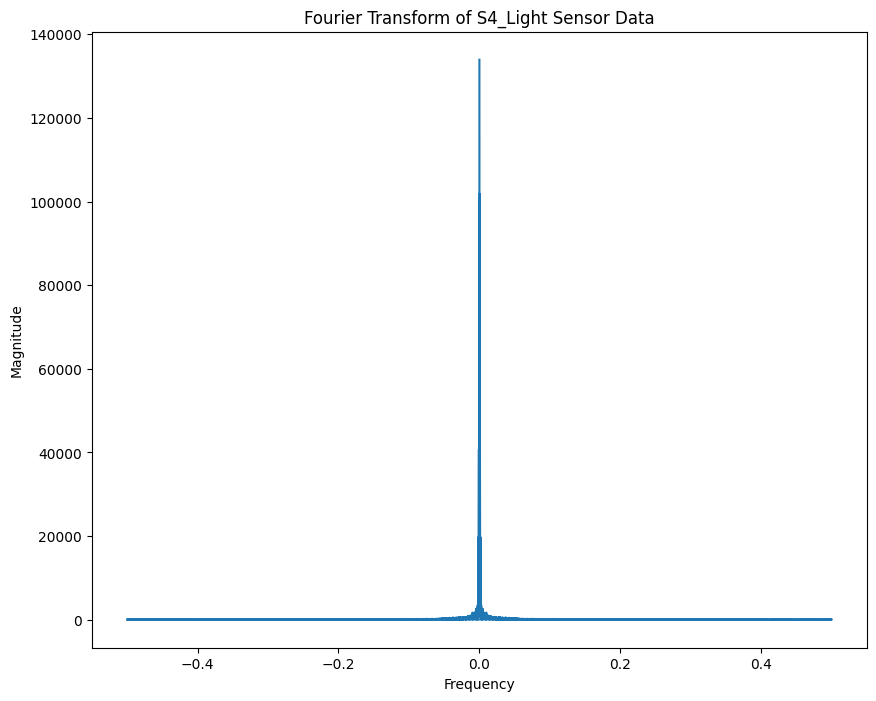

In [35]:
light_sensor1 = file['S1_Light'].values
light_sensor4 = file['S4_Light'].values

def apply_fourier_transform(series):
    fourier = np.fft.fft(series)
    frequency = np.fft.fftfreq(len(series))
    return frequency, np.abs(fourier)
    
frequency1, light_senzor1_fft = apply_fourier_transform(light_sensor1)
frequency4, light_senzor4_fft = apply_fourier_transform(light_sensor4)

plt.figure(figsize=(10,8))
plt.plot(frequency1, light_senzor1_fft)
plt.title("Fourier Transform of S1_Light Sensor Data")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


plt.figure(figsize=(10,8))
plt.plot(frequency4, light_senzor4_fft)
plt.title("Fourier Transform of S4_Light Sensor Data")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()





In [17]:
y = file['Room_Occupancy_Count']
X = file.drop('Room_Occupancy_Count', axis=1) 

X_numeric = X.select_dtypes(include=['number'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric) 
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_scaled, y)

selected_features_rfe = X_numeric.columns[rfe.support_]
print("Selected Features by RFE:", selected_features_rfe)


Selected Features by RFE: Index(['S1_Temp', 'S1_Light', 'S5_CO2'], dtype='object')


In [27]:
selected_features = selected_features_rfe
def splitdataset(data):
    day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
                   'Friday': 4, 'Saturday': 5, 'Sunday': 6}
    data['Day of week'] = data['Day of week'].map(day_mapping)
    
    X = data[selected_features].values
    Y = data['Room_Occupancy_Count'].values
    
    return train_test_split(X, Y, test_size=0.3, random_state=100)

def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:", y_pred)
    return y_pred

def cal_accuracy(y_test, y_pred):
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100, "%")
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_tree(clf_object, feature_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, rounded=True)
    plt.show()

def plot_learning_curve(clf, X_train, y_train, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
   
    plt.plot(train_sizes, train_mean, label="Training score", color="blue")
    plt.plot(train_sizes, test_mean, label="Test score", color="green")
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
    
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()




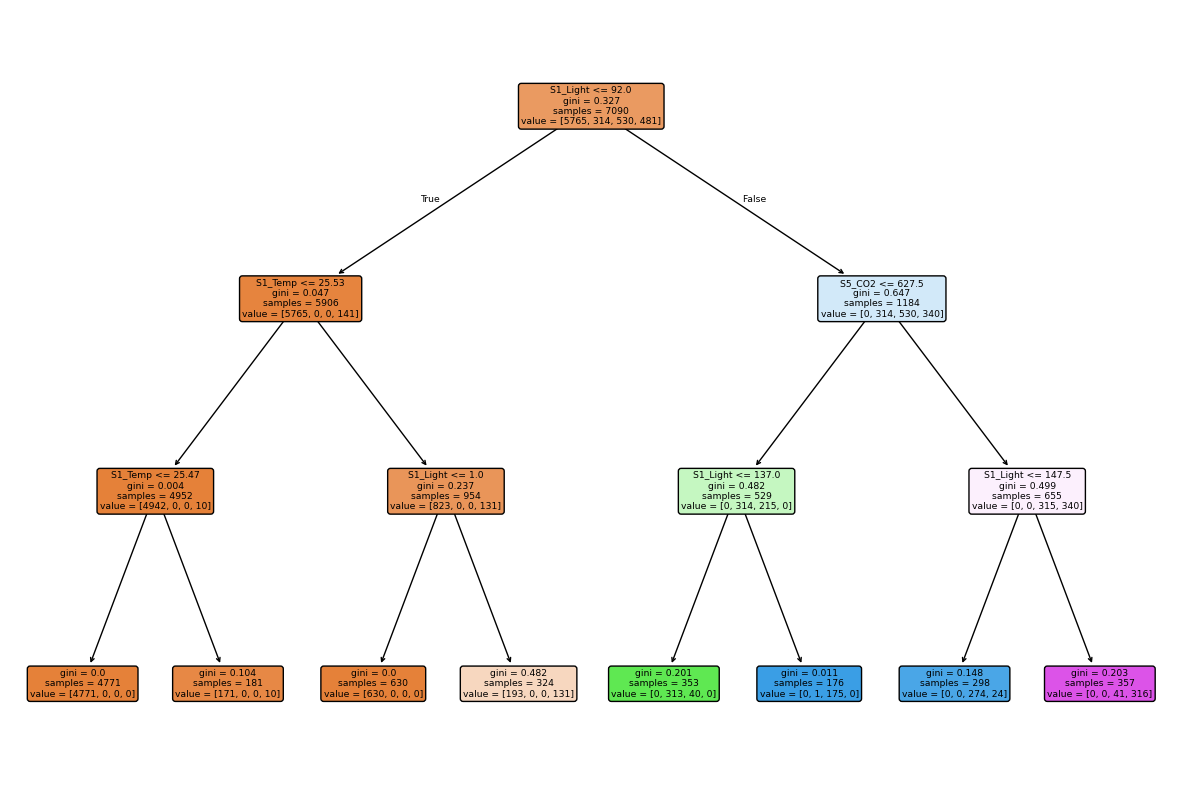

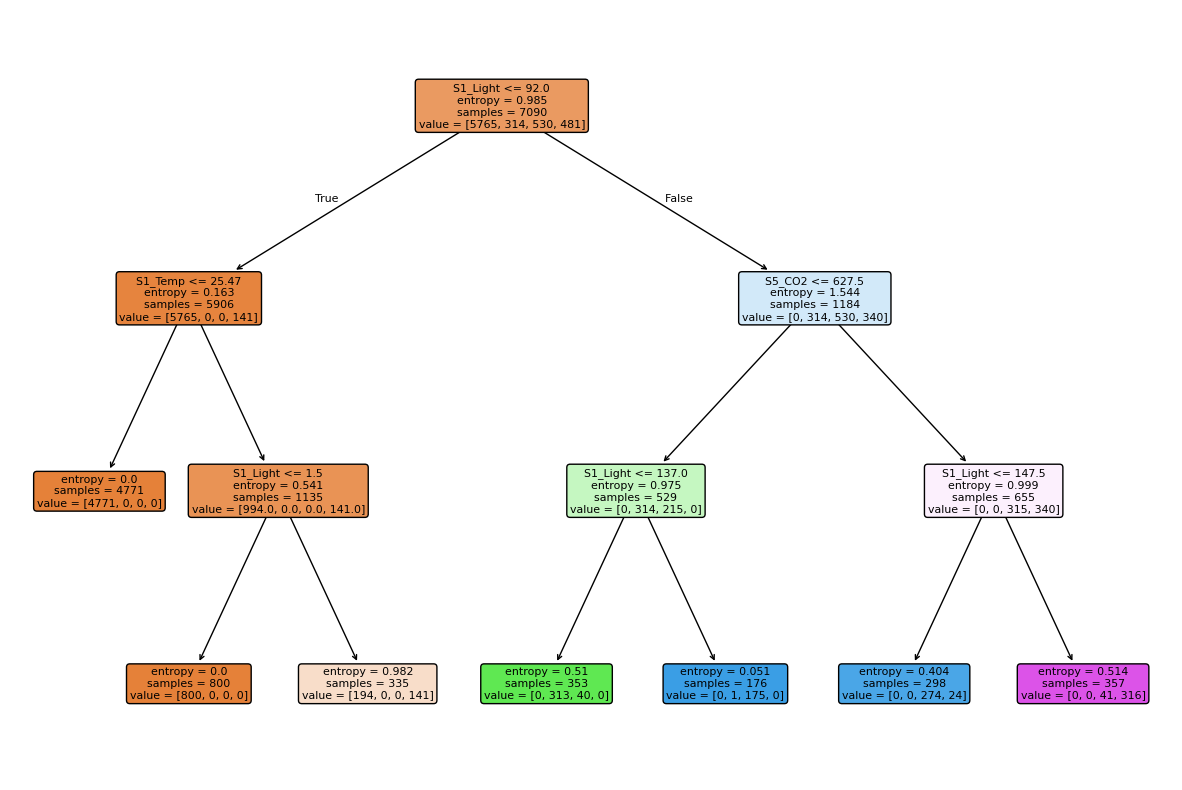

Results Using Gini Index with Selected Features:
Predicted values: [0 0 0 ... 0 0 2]

Confusion Matrix:
 [[2463    0    0    0]
 [   0  142    3    0]
 [   0   13  182   23]
 [  45    0   16  152]]
Accuracy:  96.70944389601843 %
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2463
           1       0.92      0.98      0.95       145
           2       0.91      0.83      0.87       218
           3       0.87      0.71      0.78       213

    accuracy                           0.97      3039
   macro avg       0.92      0.88      0.90      3039
weighted avg       0.97      0.97      0.97      3039

Results Using Entropy with Selected Features:
Predicted values: [0 0 0 ... 0 0 2]

Confusion Matrix:
 [[2463    0    0    0]
 [   0  142    3    0]
 [   0   13  182   23]
 [  45    0   16  152]]
Accuracy:  96.70944389601843 %
Classification Report:
               precision    recall  f1-score   support

       

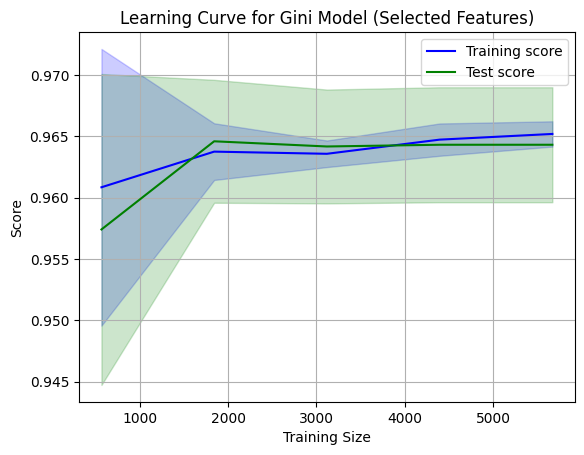

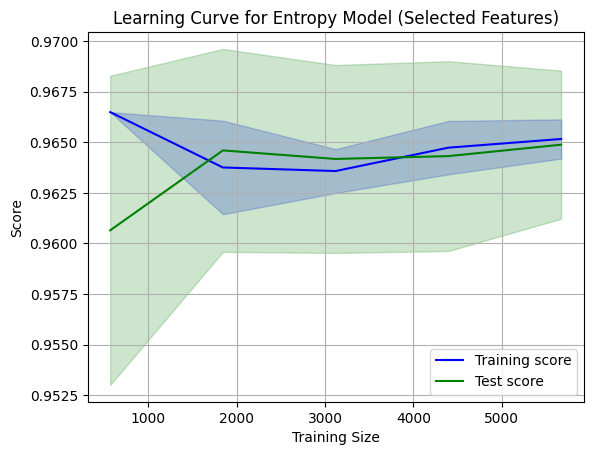

In [28]:
if __name__ == "__main__":
    data = file.copy()
    
    X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, y_train)
    clf_entropy = train_using_entropy(X_train, y_train)

    plot_decision_tree(clf_gini, selected_features)
    plot_decision_tree(clf_entropy, selected_features)
   
    print("Results Using Gini Index with Selected Features:")
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
    
    print("Results Using Entropy with Selected Features:")
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
    
    plot_learning_curve(clf_gini, X_train, y_train, title="Learning Curve for Gini Model (Selected Features)")
    plot_learning_curve(clf_entropy, X_train, y_train, title="Learning Curve for Entropy Model (Selected Features)")


Predicted values: [0 0 0 ... 0 0 2]


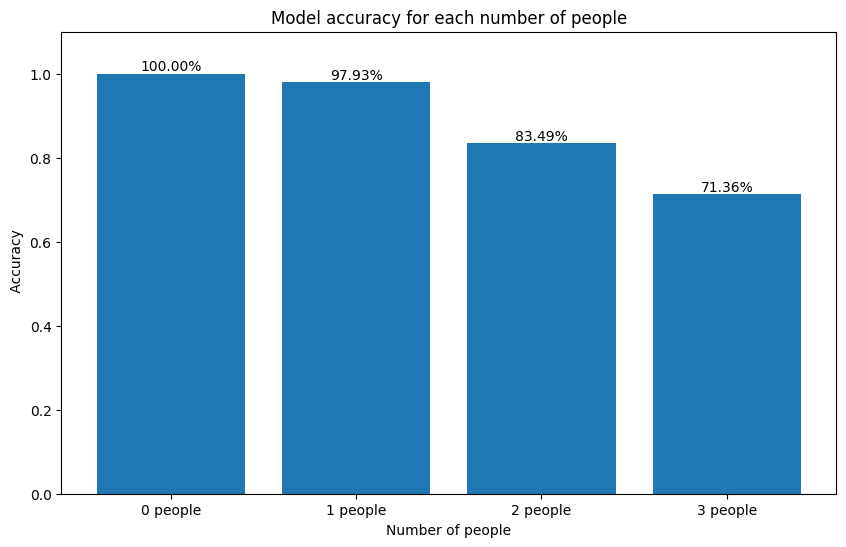

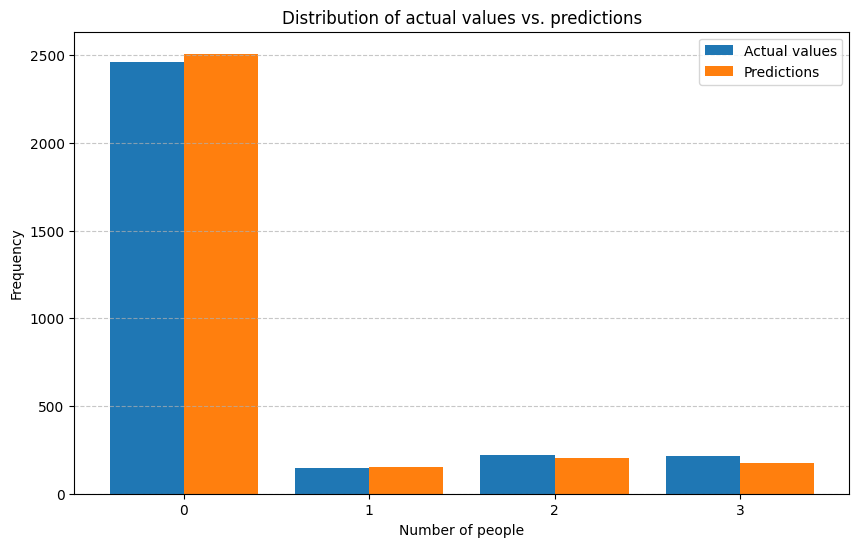

In [32]:
def plot_model_performance():
    X_train, X_test, y_train, y_test = splitdataset(file)
    clf_gini = train_using_gini(X_train, y_train)
    y_pred = prediction(X_test, clf_gini)

    accuracies = []
    for i in range(4):  
        mask = (y_test == i)
        correct_predictions = (y_pred[mask] == y_test[mask])
        accuracy = correct_predictions.sum() / len(correct_predictions) if len(correct_predictions) > 0 else 0
        accuracies.append(accuracy)
 
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(4), accuracies)
    plt.title('Model accuracy for each number of people')
    plt.xlabel('Number of people')
    plt.ylabel(' Accuracy')
    plt.xticks(range(4), ['0 people', '1 people', '2 people', '3 people'])
    

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}',
                ha='center', va='bottom')
    
    plt.ylim(0, 1.1)  
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist([y_test, y_pred], label=['Actual values', 'Predictions'], 
             bins=[-0.5, 0.5, 1.5, 2.5, 3.5], 
             rwidth=0.8, 
             align='mid') 
    plt.title('Distribution of actual values vs. predictions')
    plt.xlabel('Number of people')
    plt.ylabel('Frequency')
    plt.xticks([0, 1, 2, 3]) 
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_model_performance()

In [31]:
def optimize_hvac_settings(occupancy, current_temp, current_co2):
    BASE_TEMP = 22 
    MIN_TEMP = 20
    MAX_TEMP = 26
    BASE_AIRFLOW = 0.3 
    MIN_CO2 = 400  
    MAX_CO2 = 1000  
   
    if occupancy == 0:
        target_temp = MAX_TEMP if current_temp < MAX_TEMP else current_temp
        target_airflow = 0.1 
    else:
        temp_adjustment = 0.5 * occupancy  
        target_temp = max(MIN_TEMP, min(BASE_TEMP - temp_adjustment, MAX_TEMP))

        target_airflow = BASE_AIRFLOW * occupancy
        
        if current_co2 > MAX_CO2:
            target_airflow *= 1.5  
    energy_efficiency = calculate_energy_efficiency(current_temp, target_temp, target_airflow)
    
    return {
        'target_temperature': round(target_temp, 1),
        'target_airflow': round(target_airflow, 2),
        'energy_efficiency': energy_efficiency,
        'hvac_mode': 'economic' if occupancy == 0 else 'comfort',
        'recommendations': generate_recommendations(occupancy, current_temp, current_co2)
    }

def calculate_energy_efficiency(current_temp, target_temp, airflow):
    temp_diff = abs(current_temp - target_temp)
    energy_consumption = temp_diff * 0.5 + airflow * 0.3  
    return round(100 - energy_consumption * 10, 1)  

def generate_recommendations(occupancy, current_temp, current_co2):
    recommendations = []
    
    if occupancy == 0:
        recommendations.append(" Activate economy mode - reduce energy consumption")
    if current_co2 > 1000:
        recommendations.append("High CO2 level - increase ventilation")
    if current_temp > 26:
        recommendations.append("High temperature - activate cooling")
    elif current_temp < 20:
        recommendations.append(" Low temperature - activate heating")
    
    return recommendations

def real_time_hvac_control(model, sensor_data):
    features = sensor_data[selected_features].values.reshape(1, -1)
    predicted_occupancy = model.predict(features)[0]
    
    current_temp = sensor_data['S1_Temp'].iloc[0]
    current_co2 = sensor_data['S5_CO2'].iloc[0]
    current_light = sensor_data['S1_Light'].iloc[0]
  
    hvac_settings = optimize_hvac_settings(
        occupancy=predicted_occupancy,
        current_temp=current_temp,
        current_co2=current_co2
    )
    
    hvac_settings.update({
        'predicted_occupancy': predicted_occupancy,
        'current_conditions': {
            'temperature': current_temp,
            'co2_level': current_co2,
            'light_level': current_light
        }
    })
    
    return hvac_settings

if __name__ == "__main__":
    current_sensor_data = file.iloc[[0]]
    hvac_settings = real_time_hvac_control(clf_gini, current_sensor_data)
    
    print("HVAC Control Report")
    print("Occupancy prediction:")
    print(f" Estimated number of people: {hvac_settings['predicted_occupancy']}")
    
    print("Current conditions:")
    print(f"Current temperature: {hvac_settings['current_conditions']['temperature']:.1f}°C")
    print(f"CO2 level: {hvac_settings['current_conditions']['co2_level']:.0f} ppm")
    print(f"Lighting level: {hvac_settings['current_conditions']['light_level']:.0f} lux")
    
    print(" Recommended HVAC settings:")
    print(f"Target temperature: {hvac_settings['target_temperature']}°C")
    print(f"Airflow: {hvac_settings['target_airflow']} m³/s")
    print(f" Operating mode: {hvac_settings['hvac_mode'].upper()}")
    
    print("Efficiency:")
    print(f"Energy efficiency score: {hvac_settings['energy_efficiency']}%")
    
    print(" Recommendations and alerts")
    if hvac_settings['recommendations']:
        for rec in hvac_settings['recommendations']:
            print(f"- {rec}")
    else:
        print("- The system is operating within optimal parameters")
        
    print("Control actions:")
    temp_diff = abs(hvac_settings['current_conditions']['temperature'] - hvac_settings['target_temperature'])
    if temp_diff > 0.5:
        print(f"-Adjust temperature by {temp_diff:.1f}°C to reach the target temperature")
    if hvac_settings['current_conditions']['co2_level'] > 1000:
        print("- Increase ventilation to reduce CO2 levels")

HVAC Control Report
Occupancy prediction:
 Estimated number of people: 1
Current conditions:
Current temperature: 24.9°C
CO2 level: 390 ppm
Lighting level: 121 lux
 Recommended HVAC settings:
Target temperature: 21.5°C
Airflow: 0.3 m³/s
 Operating mode: COMFORT
Efficiency:
Energy efficiency score: 81.9%
 Recommendations and alerts
- The system is operating within optimal parameters
Control actions:
-Adjust temperature by 3.4°C to reach the target temperature
